# Importing packages and data

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nfl_data_py as nfl
import datetime

sns.set_style('whitegrid', rc={'figure.figsize':(10,0)})

In [94]:
current_year = datetime.date.today().year

rookie_df = pd.read_csv("https://raw.githubusercontent.com/JoshKepler/Portfolio/main/NFL%20Project/Output%20Results/filtered_rookie_proj.csv")
sophmore_df = pd.read_csv("https://raw.githubusercontent.com/JoshKepler/Portfolio/main/NFL%20Project/Output%20Results/filtered_2nd_year_proj.csv")
junior_df = pd.read_csv("https://raw.githubusercontent.com/JoshKepler/Portfolio/main/NFL%20Project/Output%20Results/filtered_3rd_year_proj.csv")
vet_df = pd.read_csv("https://raw.githubusercontent.com/JoshKepler/Portfolio/main/NFL%20Project/Output%20Results/filtered_4%2B_year_proj.csv")

# Data Munging

In [95]:
rookie_df = rookie_df[rookie_df['season'] == 2024]

rookie_df

,Unnamed: 0,index,season,cfb_id,player_name,pos,school,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,...,defensive_interception_touchdowns_y_pred_gbf,pass_break_ups_y_pred_gbf,coverage_targets_y_pred_gbf,allowed_recpetions_y_pred_gbf,allowed_passing_yards_y_pred_gbf,allowed_passing_touchdowns_y_pred_gbf,scrimage_yards_pred,touch_pred,proj_ff_pts,proj_ff_pts_per_game
153,2972,2935.0,2024.0,jayden-daniels-1,Jayden Daniels,QB,LSU,283.62,414.03,2743.94,...,0.0,0.0,0.0,0.0,0.0,0.0,411.92,80.68,236.7146,16.800185
154,3012,2991.0,2024.0,sam-hartman-1,Sam Hartman,QB,Notre Dame,88.31,157.97,437.14,...,0.0,0.0,0.0,0.0,0.0,0.0,36.88,6.30,43.5736,13.921278
155,3050,3032.0,2024.0,michael-penix-jr-1,Michael Penix Jr.,QB,Washington,162.49,292.84,2171.45,...,0.0,0.0,0.0,0.0,0.0,0.0,103.25,35.14,186.8430,24.649472
156,3066,3049.0,2024.0,devin-leary-1,Devin Leary,QB,Kentucky,0.16,0.50,-57.08,...,0.0,0.0,0.0,0.0,0.0,0.0,-5.08,0.34,-5.6012,-26.672381
157,3076,3060.0,2024.0,drake-maye-1,Drake Maye,QB,North Carolina,267.21,447.24,2792.05,...,0.0,0.0,0.0,0.0,0.0,0.0,329.42,53.42,198.7490,14.423004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,3147,3138.0,2024.0,ben-sinnott-1,Ben Sinnott,TE,Kansas St.,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,273.37,22.69,59.1170,4.837725
1156,3154,3145.0,2024.0,brevyn-spann-ford-1,Brevyn Spann-Ford,TE,Minnesota,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,75.89,7.01,16.5840,6.938912
1157,3156,3148.0,2024.0,cade-stover-1,Cade Stover,TE,Ohio St.,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,68.85,7.53,15.4150,2.586409
1158,3186,3181.0,2024.0,jack-westover-1,Jack Westover,TE,Washington,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,15.68,2.39,8.9680,19.080851


In [96]:
filtered_columns = [element.replace('_2nd_year_stats','') for element in sophmore_df.columns]

column_dict = dict(zip(sophmore_df.columns,filtered_columns))

sophmore_df = sophmore_df.rename(columns=column_dict)

sophmore_df = sophmore_df[sophmore_df['2nd_season'] == 2024]

sophmore_df = sophmore_df.rename(columns={'2nd_season':'season'})

sophmore_df

,Unnamed: 0,player_name,pos,school,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,...,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,scrimmage_yards,scrimmage_TDs,fantasy_points,fantasy_points/G
1,517,Anthony Richardson,QB,Florida,2024.0,6.486742e+01,6.773237e+01,7.176887e+02,1.575903e+01,9.492687,...,3.567552e-07,4.716925e-07,-0.000248,-6.168953e-04,-0.002471,0.112520,185.226246,1.887076,102.304434,34.933256
3,553,Zach Evans,RB,Mississippi,2024.0,1.362027e-08,4.086080e-08,6.810134e-07,1.362027e-08,0.000000,...,5.221550e-02,4.347989e-02,0.025975,4.417202e-02,0.129670,0.123719,552.112054,2.897187,90.778585,31.027500
5,524,Dorian Thompson-Robinson,QB,UCLA,2024.0,1.645532e+02,3.081452e+02,2.097382e+03,1.530186e+01,3.477110,...,3.567552e-07,4.716925e-07,0.000001,6.163217e-07,0.000881,0.082775,116.101241,1.420273,160.087761,27.112815
24,533,Tyjae Spears,RB,Tulane,2024.0,1.362027e-08,2.145194e-02,6.810134e-07,1.362027e-08,0.000000,...,1.211412e-01,1.042215e-01,0.099109,1.038704e-01,0.869502,0.159324,1057.756438,6.598500,195.693008,20.633527
25,554,Jahmyr Gibbs,RB,Alabama,2024.0,1.362027e-08,1.599325e-01,6.810134e-07,1.362027e-08,0.000000,...,1.160070e-01,8.679817e-02,0.118581,9.875631e-02,0.811962,0.200223,1149.723796,14.702794,264.726196,20.601562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,539,Josh Whyle,TE,Cincinnati,2024.0,9.709978e-06,1.456497e-05,8.496231e-05,0.000000e+00,0.000002,...,8.291346e-02,6.733737e-02,0.040330,6.748933e-02,0.510058,0.042005,106.869072,0.809490,25.056005,2.468054
466,562,Parker Washington,WR,Penn St.,2024.0,-2.767771e-06,-6.391203e-06,9.671797e-10,0.000000e+00,0.000000,...,8.005664e-02,6.540233e-02,0.074374,7.952928e-02,0.605353,0.053112,100.210110,0.174208,22.436759,2.449782
469,531,Antoine Green,WR,North Carolina,2024.0,-2.767771e-06,-6.391203e-06,9.671797e-10,0.000000e+00,0.000000,...,1.668232e-02,2.561296e-02,0.017090,2.157216e-02,0.098521,0.004458,16.491083,0.205238,3.440232,2.317074
496,530,Ronnie Bell,WR,Michigan,2024.0,-2.767771e-06,-6.391203e-06,9.671797e-10,0.000000e+00,0.000000,...,9.716125e-02,9.125927e-02,0.061199,7.123963e-02,0.542401,0.045469,91.498664,0.388200,16.371119,1.880266


In [97]:
filtered_columns = [element.replace('_3rd_year_stats','') for element in junior_df.columns]

column_dict = dict(zip(junior_df.columns ,filtered_columns))

junior_df = junior_df.rename(columns=column_dict)

junior_df = junior_df[junior_df['3rd_season']==2024]

junior_df = junior_df.rename(columns={'3rd_season':'season'})

junior_df

,Unnamed: 0,player_name,pos,school,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,...,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,scrimmage_yards,scrimmage_TDs,fantasy_points,fantasy_points/G
2,467,Malik Willis,QB,Liberty,2024.0,4.697880e+01,7.023267e+01,279.693430,2.823748,9.287644e-01,...,0.005415,0.004666,0.000714,0.000944,0.002382,0.024449,85.059666,0.893985,36.524240,33.865777
5,476,Skylar Thompson,QB,Kansas St.,2024.0,1.638958e+01,2.119760e+01,237.538315,1.006323,1.433358e-01,...,0.000001,0.000001,0.000043,0.000062,0.002327,0.033824,46.181174,-0.006397,18.603537,29.023986
21,457,Kyren Williams,RB,Notre Dame,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,...,0.048017,0.043082,0.067288,0.058107,0.471354,0.126392,1014.458278,7.621705,191.073699,21.436853
26,465,Snoop Conner,RB,Mississippi,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,...,0.003474,0.005513,0.002978,0.003851,0.040301,0.013969,-29.738112,-0.045514,-4.530650,20.005002
27,455,Rachaad White,RB,Arizona St.,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,...,0.126206,0.133276,0.150610,0.137041,0.938462,0.235411,1508.850995,15.816886,313.193684,19.840123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,491,Erik Ezukanma,WR,Texas Tech,2024.0,1.005820e-03,4.991199e-03,0.002395,0.000190,1.305861e-09,...,0.044452,0.066840,0.055791,0.032863,0.205950,0.040728,64.530176,0.047136,12.557008,2.419768
410,513,Cole Turner,TE,Nevada,2024.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.010429,0.017672,0.011275,0.005010,0.112026,0.001752,61.530543,-0.017055,13.272668,2.286245
430,497,Jalen Tolbert,WR,South Alabama,2024.0,-3.369311e-04,9.747503e-02,-0.014170,0.000003,1.305861e-09,...,0.024028,0.009493,0.003016,0.016711,-0.032223,0.008379,19.510233,0.174036,4.908446,1.708401
431,459,Isaiah Spiller,RB,Texas A&M,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,...,0.021475,0.016364,0.007006,0.014776,0.123043,0.037084,107.753126,0.054264,15.341184,1.658859


In [98]:
vet_df = vet_df.drop(['scrimage_yards_y_pred_gbf', 'scrimage_touchdowns_y_pred_gbf', 'fantasy_points_proj', 'fantasy_points_proj/G'], axis=1)

In [99]:
vet_df = vet_df.rename(columns={'name':'player_name','position':'pos'})
vet_df = vet_df.drop(['draft_year','age','player_id'], axis=1)
#vet_df = vet_df[vet_df['season'] == 2024]

vet_df

,Unnamed: 0,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,...,yac_sh_y_pred_gbf,wopr_y_y_pred_gbf,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf
0,126,Aaron Rodgers,QB,2024,178.263082,271.946224,2358.459680,19.243294,8.603209,13.738623,...,0.000168,0.000231,0.000127,0.000004,0.000006,0.000007,0.000153,0.000231,0.000298,0.141024
1,336,Joe Flacco,QB,2024,48.281992,61.705935,753.809551,3.445765,1.907759,4.603735,...,0.000029,0.000087,-0.000008,0.000004,0.000006,0.000007,-0.000004,-0.000005,-0.000094,0.098204
2,418,Matthew Stafford,QB,2024,348.203482,500.881397,3532.074860,23.279531,8.781146,28.878453,...,0.000008,0.000152,-0.000008,0.000004,0.000006,0.000007,-0.000004,-0.000005,-0.000094,0.175601
3,437,Brian Hoyer,QB,2024,24.676833,45.564608,233.365535,2.008236,1.194509,2.607591,...,0.000029,0.000450,0.000171,0.000004,0.000006,0.000007,0.000152,0.000514,0.002479,0.039409
4,689,Blaine Gabbert,QB,2024,73.958373,72.720164,403.058994,2.345905,1.194509,3.043076,...,0.000701,0.000475,0.000171,0.000004,0.000006,0.000007,0.000152,0.000514,0.002778,0.032492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,3051,Kylen Granson,TE,2024,0.000008,0.000023,0.000030,0.000000,0.000000,0.000000,...,0.096966,0.090444,0.071749,0.088614,0.070958,0.081772,0.113343,0.086651,0.535822,0.063169
324,3052,Luke Farrell,TE,2024,0.000008,0.000023,0.000030,0.000000,0.000000,0.000000,...,0.038445,0.080813,0.046781,0.117544,0.053193,0.066533,0.127818,0.093388,0.411025,0.051661
325,3054,Pat Freiermuth,TE,2024,0.000008,0.000023,0.000030,0.000000,0.000000,0.000000,...,0.111579,0.259974,0.105198,0.105153,0.140880,0.143875,0.139009,0.130985,0.746611,0.080460
326,3066,Kyle Pitts,TE,2024,0.035550,0.296555,0.837663,0.000000,0.000000,0.000000,...,0.092896,0.404462,0.163941,0.121877,0.186806,0.195257,0.113406,0.138993,1.085485,0.108174


In [100]:
combined_df = pd.concat([vet_df,rookie_df], axis=0)
combined_df = pd.concat([combined_df,sophmore_df], axis=0)
combined_df = pd.concat([combined_df,junior_df], axis=0)

combined_df

,Unnamed: 0,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,...,allowed_passing_yards_y_pred_gbf,allowed_passing_touchdowns_y_pred_gbf,scrimage_yards_pred,touch_pred,proj_ff_pts,proj_ff_pts_per_game,scrimmage_yards,scrimmage_TDs,fantasy_points,fantasy_points/G
0,126,Aaron Rodgers,QB,2024.0,1.782631e+02,2.719462e+02,2358.459680,19.243294,8.603209e+00,1.373862e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,336,Joe Flacco,QB,2024.0,4.828199e+01,6.170594e+01,753.809551,3.445765,1.907759e+00,4.603735e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,418,Matthew Stafford,QB,2024.0,3.482035e+02,5.008814e+02,3532.074860,23.279531,8.781146e+00,2.887845e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,437,Brian Hoyer,QB,2024.0,2.467683e+01,4.556461e+01,233.365535,2.008236,1.194509e+00,2.607591e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,689,Blaine Gabbert,QB,2024.0,7.395837e+01,7.272016e+01,403.058994,2.345905,1.194509e+00,3.043076e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,491,Erik Ezukanma,WR,2024.0,1.005820e-03,4.991199e-03,0.002395,0.000190,1.305861e-09,1.043221e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,64.530176,0.047136,12.557008,2.419768
410,513,Cole Turner,TE,2024.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,61.530543,-0.017055,13.272668,2.286245
430,497,Jalen Tolbert,WR,2024.0,-3.369311e-04,9.747503e-02,-0.014170,0.000003,1.305861e-09,1.043221e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,19.510233,0.174036,4.908446,1.708401
431,459,Isaiah Spiller,RB,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,1.331681e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,107.753126,0.054264,15.341184,1.658859


In [101]:
non_matches = [item for item in combined_df if item not in vet_df]

non_matches.append('Unnamed: 0')

print(non_matches)

['index', 'cfb_id', 'school', 'tackles_y_pred_gbf', 'assisted_tackles_y_pred_gbf', 'tackles_for_loss_y_pred_gbf', 'stops_y_pred_gbf', 'missed_tackle_rate_y_pred_gbf', 'missed_tackles_y_pred_gbf', 'forced_fumbles_y_pred_gbf', 'fumble_recoveries_y_pred_gbf', 'fumble_recovery_touchdowns_y_pred_gbf', 'total_defensive_pressures_y_pred_gbf', 'pass_rushing_hurries_y_pred_gbf', 'hits_y_pred_gbf', 'defensive_sacks_y_pred_gbf', 'safeties_y_pred_gbf', 'defensive_interceptions_y_pred_gbf', 'defensive_interception_touchdowns_y_pred_gbf', 'pass_break_ups_y_pred_gbf', 'coverage_targets_y_pred_gbf', 'allowed_recpetions_y_pred_gbf', 'allowed_passing_yards_y_pred_gbf', 'allowed_passing_touchdowns_y_pred_gbf', 'scrimage_yards_pred', 'touch_pred', 'proj_ff_pts', 'proj_ff_pts_per_game', 'scrimmage_yards', 'scrimmage_TDs', 'fantasy_points', 'fantasy_points/G', 'Unnamed: 0']


In [102]:
combined_df = combined_df.drop(columns=non_matches)
combined_df

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,yac_sh_y_pred_gbf,wopr_y_y_pred_gbf,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf
0,Aaron Rodgers,QB,2024.0,1.782631e+02,2.719462e+02,2358.459680,19.243294,8.603209e+00,1.373862e+01,1.022826e+02,...,0.000168,0.000231,0.000127,0.000004,0.000006,0.000007,0.000153,0.000231,0.000298,0.141024
1,Joe Flacco,QB,2024.0,4.828199e+01,6.170594e+01,753.809551,3.445765,1.907759e+00,4.603735e+00,3.630696e+01,...,0.000029,0.000087,-0.000008,0.000004,0.000006,0.000007,-0.000004,-0.000005,-0.000094,0.098204
2,Matthew Stafford,QB,2024.0,3.482035e+02,5.008814e+02,3532.074860,23.279531,8.781146e+00,2.887845e+01,2.035580e+02,...,0.000008,0.000152,-0.000008,0.000004,0.000006,0.000007,-0.000004,-0.000005,-0.000094,0.175601
3,Brian Hoyer,QB,2024.0,2.467683e+01,4.556461e+01,233.365535,2.008236,1.194509e+00,2.607591e+00,2.012871e+01,...,0.000029,0.000450,0.000171,0.000004,0.000006,0.000007,0.000152,0.000514,0.002479,0.039409
4,Blaine Gabbert,QB,2024.0,7.395837e+01,7.272016e+01,403.058994,2.345905,1.194509e+00,3.043076e+00,2.148055e+01,...,0.000701,0.000475,0.000171,0.000004,0.000006,0.000007,0.000152,0.000514,0.002778,0.032492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Erik Ezukanma,WR,2024.0,1.005820e-03,4.991199e-03,0.002395,0.000190,1.305861e-09,1.043221e-09,1.014651e-09,...,0.031880,0.069358,0.072959,0.009078,0.044452,0.066840,0.055791,0.032863,0.205950,0.040728
410,Cole Turner,TE,2024.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.013450,0.033028,0.021679,0.014671,0.010429,0.017672,0.011275,0.005010,0.112026,0.001752
430,Jalen Tolbert,WR,2024.0,-3.369311e-04,9.747503e-02,-0.014170,0.000003,1.305861e-09,1.043221e-09,1.014651e-09,...,0.009810,0.075086,0.012022,0.011163,0.024028,0.009493,0.003016,0.016711,-0.032223,0.008379
431,Isaiah Spiller,RB,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,1.331681e-07,1.065345e-06,...,0.037431,0.023938,0.019690,0.010976,0.021475,0.016364,0.007006,0.014776,0.123043,0.037084


# Creating scoring columns

In [103]:
#Edit your scoring setting in the dictionary below based on your league rules

scoring_dict = {
'passing_yards_y_pred_gbf':.04,
'passing_tds_y_pred_gbf':4, 
'interceptions_y_pred_gbf':-2,
'sack_fumbles_y_pred_gbf':-1,
'sack_fumbles_lost_y_pred_gbf':-1,
'passing_2pt_conversions_y_pred_gbf':2,
'rushing_yards_y_pred_gbf':.1,
'rushing_tds_y_pred_gbf':6, 
'rushing_fumbles_y_pred_gbf':-1,
'rushing_fumbles_lost_y_pred_gbf':-1, 
'rushing_first_downs_y_pred_gbf':.5,
'rushing_2pt_conversions_y_pred_gbf':2,
'receptions_y_pred_gbf':.5,
'receiving_yards_y_pred_gbf':.1,
'receiving_tds_y_pred_gbf':6,
'receiving_fumbles_y_pred_gbf':-1, 
'receiving_fumbles_lost_y_pred_gbf':-1,
'receiving_first_downs_y_pred_gbf':.5,
'receiving_2pt_conversions_y_pred_gbf':2
}

combined_df['fantasy_points_proj'] = combined_df[scoring_dict.keys()].mul(list(scoring_dict.values()), axis=1).sum(axis=1)
combined_df['fantasy_points_proj/G'] = combined_df['fantasy_points_proj'] / combined_df['games_y_pred_gbf']

combined_df.sort_values(by='fantasy_points_proj', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G
238,CeeDee Lamb,WR,2024.0,-1.236595e-02,1.814331e-02,-0.176450,-0.005534,2.704213e-02,9.999961e-01,3.024698e+00,...,0.335969,0.377571,0.331098,0.322673,0.283888,0.324133,2.689373,0.199502,318.335558,20.545287
27,Rachaad White,RB,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,1.331681e-07,1.065345e-06,...,0.140948,0.160447,0.126206,0.133276,0.150610,0.137041,0.938462,0.235411,313.781543,19.877363
30,James Cook,RB,2024.0,1.526255e-01,9.321766e-07,2.572810,0.000000,1.331681e-07,1.331681e-07,1.065345e-06,...,0.081942,0.099827,0.100443,0.094071,0.122901,0.077626,0.541300,0.171115,296.544165,19.659948
221,A.J. Brown,WR,2024.0,-2.511573e-02,2.913619e-01,-0.059035,0.000465,4.716436e-02,1.043645e-07,7.435519e-07,...,0.340796,0.268588,0.354337,0.333690,0.308594,0.340009,2.384527,0.199835,293.721762,18.899550
172,Tyreek Hill,WR,2024.0,1.784369e-01,9.558793e-01,1.296750,0.185379,3.330244e-01,1.043645e-07,3.820896e+00,...,0.359391,0.372762,0.334281,0.348999,0.314508,0.346990,2.526084,0.207273,288.692776,18.893659
36,Josh Allen,QB,2024.0,3.635826e+02,4.966001e+02,3840.295947,16.134057,9.975930e+00,3.481304e+01,2.406415e+02,...,0.002759,0.062992,0.006599,0.006430,0.024236,0.017144,0.038470,0.168092,284.776971,21.947177
37,Puka Nacua,WR,2024.0,1.565851e+00,1.403588e+00,30.072550,0.000000,0.000000e+00,3.186312e-01,4.875988e+00,...,0.323908,0.221377,0.298635,0.299533,0.278002,0.294869,2.056028,0.198000,274.019040,18.560215
65,Derrick Henry,RB,2024.0,2.582283e-06,-3.498478e-02,1.305811,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,...,0.059647,0.033463,0.052961,0.057843,0.061713,0.047973,0.396200,0.232701,270.387525,17.312575
28,Patrick Mahomes,QB,2024.0,3.600680e+02,5.394746e+02,3957.863520,25.333801,8.034803e+00,3.061783e+01,2.462373e+02,...,0.000173,0.000004,0.000006,0.000007,-0.000039,-0.000096,0.000565,0.150272,269.992508,17.169438
257,Amon-Ra St. Brown,WR,2024.0,-1.124707e-02,-1.556625e-02,-0.167815,-0.003305,9.899447e-03,1.043645e-07,7.435519e-07,...,0.303373,0.299375,0.273062,0.262016,0.307001,0.293756,2.034774,0.184787,269.169444,16.537153


# Previewing top 10 positions by fantasy scoring

In [104]:
pos_list = combined_df['pos'].unique()

In [105]:
combined_df[combined_df['pos'] == 'QB'].sort_values(by='fantasy_points_proj', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G
36,Josh Allen,QB,2024.0,363.582584,496.600067,3840.295947,16.134057,9.975930,34.813044,240.641496,...,2.759341e-03,0.062992,6.599102e-03,6.430405e-03,0.024236,0.017144,0.038470,0.168092,284.776971,21.947177
28,Patrick Mahomes,QB,2024.0,360.068042,539.474555,3957.863520,25.333801,8.034803,30.617833,246.237280,...,1.725620e-04,0.000004,5.949473e-06,6.840856e-06,-0.000039,-0.000096,0.000565,0.150272,269.992508,17.169438
46,Jalen Hurts,QB,2024.0,280.339696,414.442150,2350.730375,18.925123,10.404569,28.681063,214.289341,...,1.106997e-02,0.090571,1.360975e-02,1.902337e-02,0.050749,0.026553,0.079409,0.157482,262.303837,21.036444
47,Brock Purdy,QB,2024.0,289.310952,423.053957,3659.839399,24.770961,5.924918,28.019617,214.813122,...,9.735133e-07,0.000002,1.009030e-06,1.093592e-06,0.000008,0.000003,0.000004,0.196946,260.547267,16.882194
9,Kirk Cousins,QB,2024.0,357.966000,552.166517,4007.805898,25.906448,8.892318,30.225773,212.095310,...,-1.301517e-05,0.000004,5.949473e-06,6.840856e-06,-0.000004,-0.000005,-0.000094,0.195580,259.778322,15.874615
20,Dak Prescott,QB,2024.0,364.162451,539.817069,3876.263137,25.959198,12.177503,28.992726,192.666807,...,-8.307556e-06,0.000004,5.949473e-06,6.840856e-06,-0.000004,-0.000005,-0.000094,0.158866,250.232361,16.644684
30,C.J. Stroud,QB,2024.0,336.667091,493.678862,3986.992656,20.702556,13.387172,28.682589,197.318527,...,3.549799e-04,0.000002,3.567552e-07,4.716925e-07,0.000110,0.000169,0.002325,0.183624,249.907619,19.111826
50,Trevor Lawrence,QB,2024.0,321.258237,484.422480,3770.181869,23.431304,10.785854,28.996622,198.925251,...,4.254253e-05,0.000004,5.949473e-06,6.840856e-06,-0.000004,-0.000005,-0.000094,0.206575,245.707073,19.681956
45,Justin Herbert,QB,2024.0,300.434758,493.567840,3471.103114,22.924915,6.699446,29.780259,212.797104,...,-9.005202e-04,0.000004,5.949473e-06,6.840856e-06,-0.000291,-0.000005,-0.006128,0.198984,239.485444,20.739824
153,Jayden Daniels,QB,2024.0,283.620000,414.030000,2743.940000,20.130000,9.110000,41.860000,330.370000,...,0.000000e+00,0.010000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.140000,236.714600,16.800185


In [106]:
combined_df[combined_df['pos'] == 'RB'].sort_values(by='fantasy_points_proj', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G
27,Rachaad White,RB,2024.0,3.995042e-07,9.321766e-07,3.595538e-06,0.000000e+00,1.331681e-07,1.331681e-07,0.000001,...,0.140948,0.160447,0.126206,0.133276,0.150610,0.137041,0.938462,0.235411,313.781543,19.877363
30,James Cook,RB,2024.0,1.526255e-01,9.321766e-07,2.572810e+00,0.000000e+00,1.331681e-07,1.331681e-07,0.000001,...,0.081942,0.099827,0.100443,0.094071,0.122901,0.077626,0.541300,0.171115,296.544165,19.659948
65,Derrick Henry,RB,2024.0,2.582283e-06,-3.498478e-02,1.305811e+00,1.936712e-06,0.000000e+00,0.000000e+00,0.000000,...,0.059647,0.033463,0.052961,0.057843,0.061713,0.047973,0.396200,0.232701,270.387525,17.312575
25,Jahmyr Gibbs,RB,2024.0,1.362027e-08,1.599325e-01,6.810134e-07,1.362027e-08,0.000000e+00,0.000000e+00,0.000000,...,0.121636,0.080578,0.116007,0.086798,0.118581,0.098756,0.811962,0.200223,266.398108,20.731673
45,Kenneth Walker,RB,2024.0,3.995042e-07,9.321766e-07,3.595538e-06,0.000000e+00,1.331681e-07,1.331681e-07,0.000001,...,0.110662,0.114177,0.084545,0.077220,0.128353,0.108937,0.742247,0.188569,259.409941,17.488663
46,Tyler Allgeier,RB,2024.0,3.995042e-07,9.321766e-07,3.595538e-06,0.000000e+00,1.331681e-07,1.331681e-07,0.000001,...,0.101145,0.071540,0.069926,0.077436,0.119538,0.103764,0.677900,0.176714,233.668038,17.161071
53,Breece Hall,RB,2024.0,3.017975e-02,1.140897e+00,1.114729e+00,0.000000e+00,1.331681e-07,1.331681e-07,0.000001,...,0.160067,0.123470,0.142011,0.118431,0.094092,0.093351,1.063817,0.140220,233.313420,16.956438
28,Bijan Robinson,RB,2024.0,1.362027e-08,1.720745e-01,6.810134e-07,1.362027e-08,0.000000e+00,0.000000e+00,0.000000,...,0.145235,0.163875,0.125472,0.117737,0.091262,0.108252,0.854219,0.227054,221.493088,19.797499
39,Brian Robinson,RB,2024.0,3.995042e-07,9.321766e-07,3.595538e-06,0.000000e+00,1.331681e-07,1.331681e-07,0.000001,...,0.083186,0.075335,0.081127,0.089822,0.064069,0.077576,0.545762,0.172778,219.588531,18.003506
70,Christian McCaffrey,RB,2024.0,2.582283e-06,1.708906e-03,6.136325e-01,1.936712e-06,0.000000e+00,0.000000e+00,0.000000,...,0.106363,0.087626,0.133379,0.147604,0.114495,0.140261,0.714848,0.177282,219.135377,17.179543


In [107]:
combined_df[combined_df['pos'] == 'WR'].sort_values(by='fantasy_points_proj', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G
238,CeeDee Lamb,WR,2024.0,-0.012366,0.018143,-0.176450,-0.005534,0.027042,9.999961e-01,3.024698e+00,...,0.335969,0.377571,0.331098,0.322673,0.283888,0.324133,2.689373,0.199502,318.335558,20.545287
221,A.J. Brown,WR,2024.0,-0.025116,0.291362,-0.059035,0.000465,0.047164,1.043645e-07,7.435519e-07,...,0.340796,0.268588,0.354337,0.333690,0.308594,0.340009,2.384527,0.199835,293.721762,18.899550
172,Tyreek Hill,WR,2024.0,0.178437,0.955879,1.296750,0.185379,0.333024,1.043645e-07,3.820896e+00,...,0.359391,0.372762,0.334281,0.348999,0.314508,0.346990,2.526084,0.207273,288.692776,18.893659
37,Puka Nacua,WR,2024.0,1.565851,1.403588,30.072550,0.000000,0.000000,3.186312e-01,4.875988e+00,...,0.323908,0.221377,0.298635,0.299533,0.278002,0.294869,2.056028,0.198000,274.019040,18.560215
257,Amon-Ra St. Brown,WR,2024.0,-0.011247,-0.015566,-0.167815,-0.003305,0.009899,1.043645e-07,7.435519e-07,...,0.303373,0.299375,0.273062,0.262016,0.307001,0.293756,2.034774,0.184787,269.169444,16.537153
158,Stefon Diggs,WR,2024.0,0.015940,0.518716,1.284200,0.001177,0.000247,1.043645e-07,7.435519e-07,...,0.325812,0.304228,0.306124,0.298260,0.312492,0.332879,2.300285,0.199524,255.319522,17.020729
201,D.J. Moore,WR,2024.0,0.188430,0.302368,0.149894,0.053062,0.314808,1.043645e-07,7.435519e-07,...,0.317953,0.302456,0.307715,0.312366,0.307258,0.308076,1.990348,0.170891,253.568995,28.451953
234,Justin Jefferson,WR,2024.0,0.340893,0.820649,7.484762,0.527754,0.075912,1.043645e-07,7.435519e-07,...,0.373064,0.394072,0.279707,0.317925,0.352642,0.337869,2.787046,0.217786,251.655001,22.937366
148,Keenan Allen,WR,2024.0,0.339788,0.695363,9.731247,0.312259,0.000195,9.999961e-01,2.047695e+00,...,0.275495,0.247815,0.289169,0.267750,0.284469,0.286535,2.243064,0.188194,248.588429,16.199619
153,Mike Evans,WR,2024.0,-0.007519,-0.019902,-0.016038,-0.002183,-0.000003,1.043645e-07,7.435519e-07,...,0.272886,0.373867,0.270571,0.275886,0.357836,0.290451,1.737632,0.172791,224.521661,15.583031


In [108]:
combined_df[combined_df['pos'] == 'TE'].sort_values(by='fantasy_points_proj', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G
263,Travis Kelce,TE,2024.0,0.100008,0.047548,0.440643,0.0,0.0,0.0,0.0,...,0.232540,0.157644,0.243357,0.238138,0.202563,0.194680,1.712387,0.143753,236.491669,14.975067
277,George Kittle,TE,2024.0,0.000008,0.000023,0.000030,0.0,0.0,0.0,0.0,...,0.217532,0.175250,0.227548,0.220241,0.213168,0.232012,1.726798,0.150775,208.896845,13.006798
297,T.J. Hockenson,TE,2024.0,0.000008,0.000023,0.000030,0.0,0.0,0.0,0.0,...,0.204870,0.188602,0.210165,0.211321,0.231557,0.228621,1.522312,0.130594,188.305413,12.962276
283,David Njoku,TE,2024.0,0.000008,0.000023,0.000030,0.0,0.0,0.0,0.0,...,0.182499,0.186290,0.176995,0.186863,0.173739,0.177771,1.228213,0.134743,170.546897,12.888542
282,Evan Engram,TE,2024.0,0.000008,0.000023,0.000030,0.0,0.0,0.0,0.0,...,0.178781,0.173359,0.158003,0.167052,0.176752,0.163479,1.328173,0.127136,150.464708,12.719533
1148,Brock Bowers,TE,2024.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.190000,0.220000,0.200000,0.150000,0.180000,0.190000,1.260000,0.110000,149.490000,9.681995
288,Dallas Goedert,TE,2024.0,0.000008,0.000023,0.000030,0.0,0.0,0.0,0.0,...,0.162185,0.168145,0.193403,0.198919,0.131096,0.189784,1.410288,0.131452,134.917162,9.191027
195,Trey McBride,TE,2024.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.218737,0.222577,0.212944,0.226869,0.243101,0.224162,1.582936,0.131550,123.385345,8.541472
311,Cole Kmet,TE,2024.0,0.000008,0.000023,0.000030,0.0,0.0,0.0,0.0,...,0.185976,0.211155,0.208565,0.208970,0.165847,0.182073,1.187931,0.132896,120.861177,8.295127
291,Dalton Schultz,TE,2024.0,0.000008,0.000023,0.000030,0.0,0.0,0.0,0.0,...,0.168942,0.132582,0.175537,0.174517,0.133317,0.139460,1.291229,0.122155,119.795720,8.148478


# Plotting projected fantasy points by position

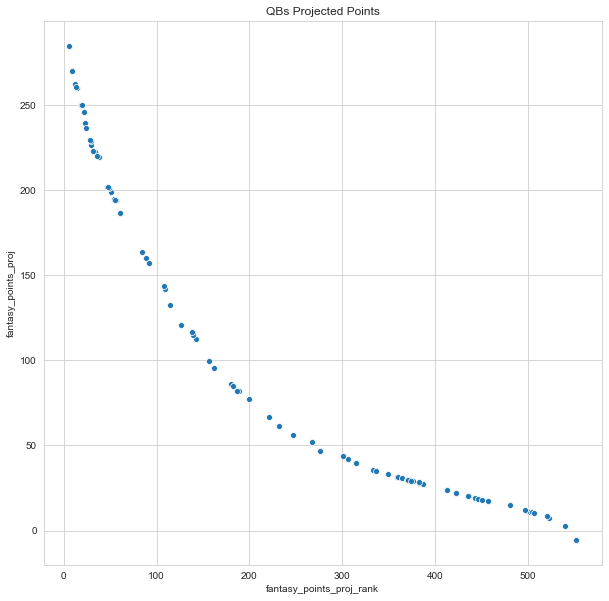

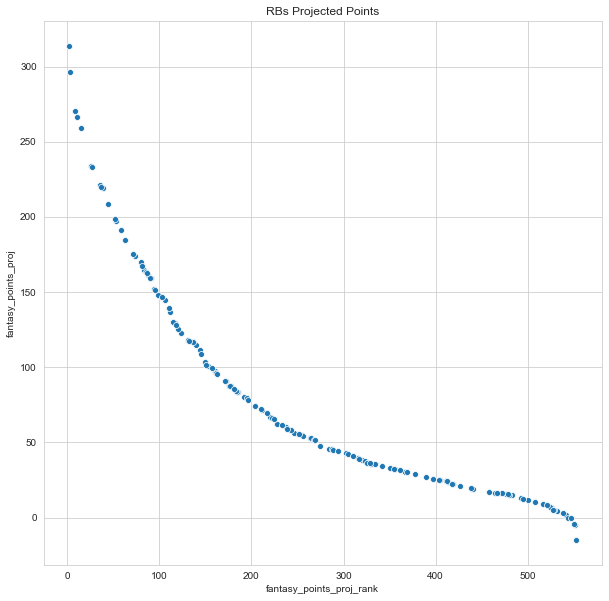

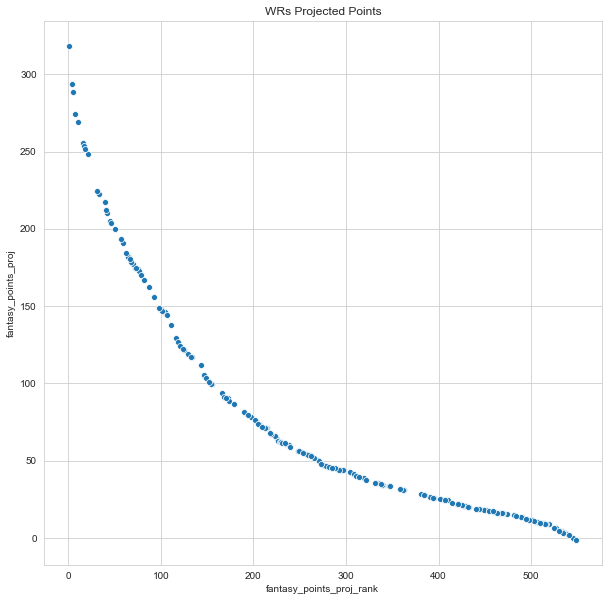

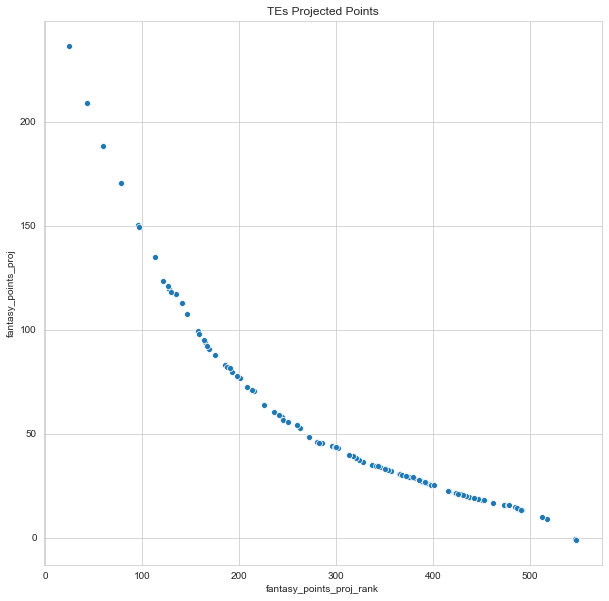

In [109]:
combined_df['fantasy_points_proj/G_rank'] = combined_df['fantasy_points_proj/G'].rank(ascending=False)
combined_df['fantasy_points_proj_rank'] = combined_df['fantasy_points_proj'].rank(ascending=False)


for pos in pos_list:
    fig, ax = plt.subplots(figsize=[10,10])
    plt.title(pos+'s Projected Points')
    sns.scatterplot(data = combined_df[combined_df['pos'] == pos], y='fantasy_points_proj', x='fantasy_points_proj_rank',  legend='full')

# Top 100 player table & graph by projected fantasy points

In [110]:
combined_df[combined_df['fantasy_points_proj_rank'] <= 100].sort_values(by='fantasy_points_proj_rank')

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G,fantasy_points_proj/G_rank,fantasy_points_proj_rank
238,CeeDee Lamb,WR,2024.0,-1.236595e-02,1.814331e-02,-0.176450,-0.005534,2.704213e-02,9.999961e-01,3.024698e+00,...,0.331098,0.322673,0.283888,0.324133,2.689373,0.199502,318.335558,20.545287,24.0,1.0
27,Rachaad White,RB,2024.0,3.995042e-07,9.321766e-07,0.000004,0.000000,1.331681e-07,1.331681e-07,1.065345e-06,...,0.126206,0.133276,0.150610,0.137041,0.938462,0.235411,313.781543,19.877363,28.0,2.0
30,James Cook,RB,2024.0,1.526255e-01,9.321766e-07,2.572810,0.000000,1.331681e-07,1.331681e-07,1.065345e-06,...,0.100443,0.094071,0.122901,0.077626,0.541300,0.171115,296.544165,19.659948,31.0,3.0
221,A.J. Brown,WR,2024.0,-2.511573e-02,2.913619e-01,-0.059035,0.000465,4.716436e-02,1.043645e-07,7.435519e-07,...,0.354337,0.333690,0.308594,0.340009,2.384527,0.199835,293.721762,18.899550,35.0,4.0
172,Tyreek Hill,WR,2024.0,1.784369e-01,9.558793e-01,1.296750,0.185379,3.330244e-01,1.043645e-07,3.820896e+00,...,0.334281,0.348999,0.314508,0.346990,2.526084,0.207273,288.692776,18.893659,36.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Evan Engram,TE,2024.0,7.606234e-06,2.281870e-05,0.000030,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.158003,0.167052,0.176752,0.163479,1.328173,0.127136,150.464708,12.719533,115.0,96.0
1148,Brock Bowers,TE,2024.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.200000,0.150000,0.180000,0.190000,1.260000,0.110000,149.490000,9.681995,171.0,97.0
207,Jaxon Smith-Njigba,WR,2024.0,1.273746e-01,2.047299e-01,30.194130,0.000000,0.000000e+00,1.027804e-09,1.012152e-09,...,0.214917,0.215893,0.254176,0.222683,1.585717,0.156834,148.825994,8.774154,198.0,98.0
454,Bucky Irving,RB,2024.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.090000,0.090000,0.080000,0.100000,0.690000,0.110000,148.303000,11.329488,136.0,99.0


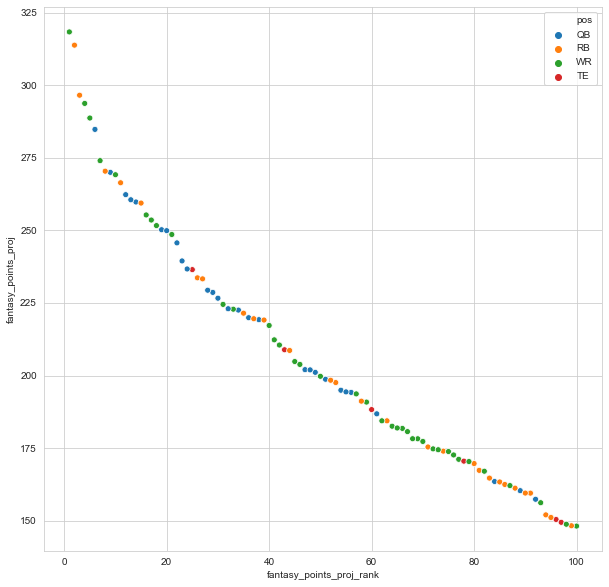

In [111]:
fig, ax = plt.subplots(figsize=[10,10])
sns.scatterplot(data = combined_df[combined_df['fantasy_points_proj_rank'] <= 100], y='fantasy_points_proj', x='fantasy_points_proj_rank', hue='pos',  legend='full')

# (Optional) CSV extract

In [ ]:
combined_df.to_csv('combined_proj.csv')